# Multi-frequency inversion with EMagPy

This notebook compared a mutli-coil instruments (CMD Explorer) and a multi-frequency instrument (GEM-2) synthetically.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from emagpy import Problem

  0%|                                                    | 0/20 [00:00<?, ?it/s]

Forward modelling
Forward modelling


100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 158.83it/s]


Starting the ROPE algotrithm with 1000 repetitions...
Initializing the  RObust Parameter Estimation (ROPE) algorithm  with  1000  repetitions
The objective function will be maximized
SPOTPY will automatically adjust the number of total repetitions.
Starting the ROPE algotrithm with 1000 repetitions...
Initializing the  RObust Parameter Estimation (ROPE) algorithm  with  1000  repetitions
The objective function will be maximized
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
Starting the ROPE algotrithm with 1000 repetitions...
Initializing the  RObust Parameter Estimation (ROPE) algorithm  with  1000  repetitions
The objective function will be maximized
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
Starting the ROPE algotrithm with 

100%|████████████████████████████████████████| 20/20 [00:00<00:00, 12550.28it/s]


Starting the ROPE algotrithm with 1000 repetitions...
Initializing the  RObust Parameter Estimation (ROPE) algorithm  with  1000  repetitions
The objective function will be maximized
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
Starting the ROPE algotrithm with 1000 repetitions...
Initializing the  RObust Parameter Estimation (ROPE) algorithm  with  1000  repetitions
The objective function will be maximized
SPOTPY will automatically adjust the number of total repetitions.
Starting the ROPE algotrithm with 1000 repetitions...
Initializing the  RObust Parameter Estimation (ROPE) algorithm  with  1000  repetitions
The objective function will be maximized
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
Starting the ROPE algotrithm with 1000 repetitions...
Initializing the  RObust Parameter Estimation (ROPE) 

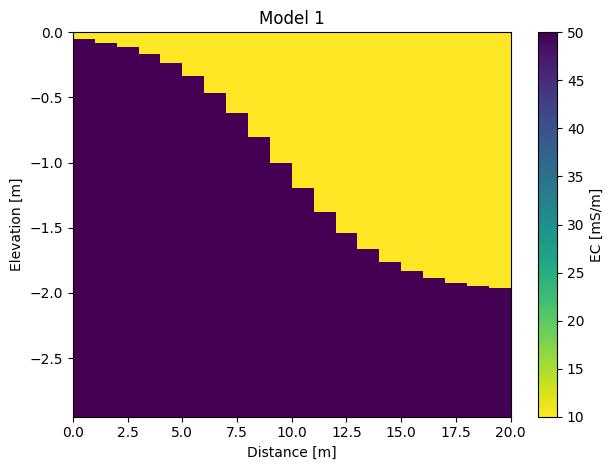

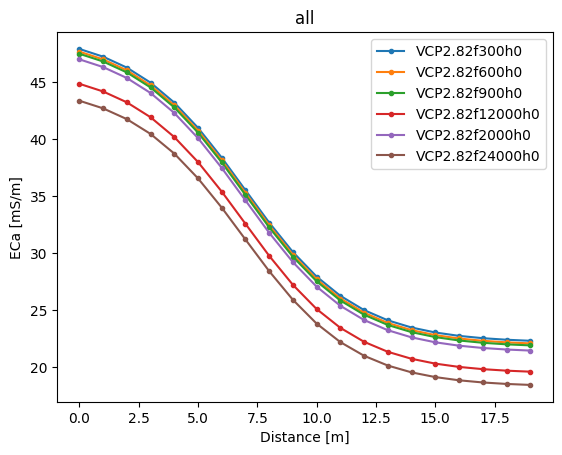

In [2]:
# parameters for the synthetic model
nlayer = 2 # number of layers
npos = 20 # number of positions/sampling locations
conds = np.ones((npos, nlayer))*[10, 50] # EC in mS/m
x = np.linspace(0.1, 2, npos)[:,None]
depths = 0 + 2/(1+np.exp(-4*(x-1))) # depth of model

# defines coils configuration, frequency and height above the ground
coilsA = ['VCP1.48f10000h0', 'VCP2.82f10000h0', 'VCP4.49f10000h0',
        'HCP1.48f10000h0', 'HCP2.82f10000h0', 'HCP4.49f10000h0']
coilsB = ['VCP2.82f300h0', 'VCP2.82f600h0', 'VCP2.82f900h0',
        'VCP2.82f12000h0', 'VCP2.82f2000h0', 'VCP2.82f24000h0']
coilsList = [coilsA, coilsB]

# foward modelling
ks = []
for i, coils in enumerate(coilsList):
    k = Problem()
    k.setModels([depths], [conds])
    _ = k.forward(forwardModel='FSlin', coils=coils, noise=0.0)
    ks.append(k)
k.showResults() # display original model
k.show() # display ECa computed from forward modelling

for k, fm in zip(ks, ['FSlin']*len(coilsList)):
    k.setInit(depths0=[0.5], fixedDepths=[False],
              conds0=[20, 20], fixedConds=[False, False]) # set initial values
    # invert using ROPE solver (RObust Parameter Estimation)
    k.invert(forwardModel=fm, method='ROPE', regularization='l1', alpha=0,
             bnds=[(0.01, 3), (0, 80), (0, 80)], rep=1000, njobs=-1)

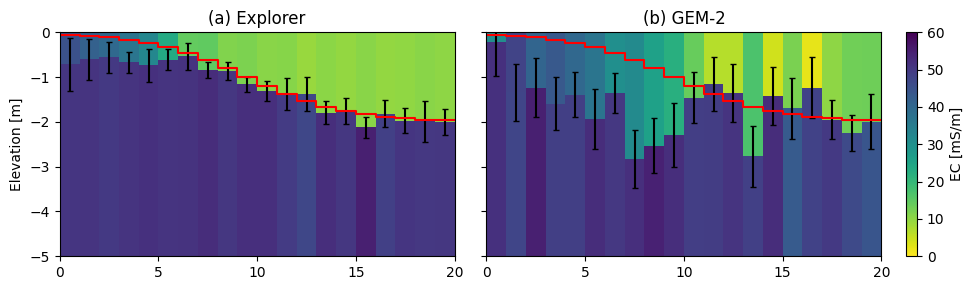

In [3]:
# figure
titles = ['(a) Explorer', '(b) GEM-2', '(c)', '(d)']
fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=True)
axs = axs.flatten()
for i, k in enumerate(ks):
    ax = axs[i]
    k.showResults(ax=ax, vmin=0, vmax=60, maxDepth=5, errorbar=True, dist=False)
    ax.step(-np.vstack([depths, depths[-1,:]]), 'r-', where='post')
    if i % 2 == 0:
        fig.axes[-1].remove() # remove colorbar
    else:
        ax.set_ylabel('')
    if i < 2:
        ax.set_xlabel('')
    ax.set_title(titles[i])
ax.set_xticks(np.arange(0, 21, 5))
fig.tight_layout()